# Support Vector Machines

https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

## What is Support Vector Machine?

"Support Vector Machine" (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.

![](assets/SVM_1.png)

Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line).

## How does it work?
Above, we got accustomed to the process of segregating the two classes with a hyper-plane. Now the burning question is "How can we identify the right hyper-plane?". Don't worry, it's not as hard as you think!

Let's understand:

+ **Identify the right hyper-plane (Scenario-1):** Here, we have three hyper-planes (A, B and C). Now, identify the right hyper-plane to classify star and circle.

![](assets/SVM_21.png)

You need to remember a thumb rule to identify the right hyper-plane: "Select the hyper-plane which segregates the two classes better". In this scenario, hyper-plane "B" has excellently performed this job.

+ **Identify the right hyper-plane (Scenario-2):** Here, we have three hyper-planes (A, B and C) and all are segregating the classes well. Now, How can we identify the right hyper-plane?

![](assets/SVM_3.png)

Here, maximizing the distances between nearest data point (either class) and hyper-plane will help us to decide the right hyper-plane. This distance is called as **Margin**. Let's look at the below snapshot:

![](assets/SVM_4.png)

Above, you can see that the margin for hyper-plane C is high as compared to both A and B. Hence, we name the right hyper-plane as C. Another lightning reason for selecting the hyper-plane with higher margin is robustness. If we select a hyper-plane having low margin then there is high chance of miss-classification.

+ **Identify the right hyper-plane (Scenario-3):**Hint: Use the rules as discussed in previous section to identify the right hyper-plane

![](assets/SVM_5.png)

Some of you may have selected the hyper-plane **B** as it has higher margin compared to **A**. But, here is the catch, SVM selects the hyper-plane which classifies the classes accurately prior to maximizing margin. Here, hyper-plane B has a classification error and A has classified all correctly. Therefore, the right hyper-plane is **A**.

+ **Can we classify two classes (Scenario-4)?**: Below, I am unable to segregate the two classes using a straight line, as one of star lies in the territory of other(circle) class as an outlier. 

![](assets/SVM_61.png)

As I have already mentioned, one star at other end is like an outlier for star class. SVM has a feature to ignore outliers and find the hyper-plane that has maximum margin. Hence, we can say, SVM is robust to outliers.

![](assets/SVM_71.png)

+ **Find the hyper-plane to segregate to classes (Scenario-5):** In the scenario below, we can’t have linear hyper-plane between the two classes, so how does SVM classify these two classes? Till now, we have only looked at the linear hyper-plane.

![](assets/SVM_8.png)

SVM can solve this problem. Easily! It solves this problem by introducing additional feature. Here, we will add a new feature z=x^2+y^2. Now, let's plot the data points on axis x and z:

![](assets/SVM_9.png)

In above plot, points to consider are:

+ All values for z would be positive always because z is the squared sum of both x and y
+ In the original plot, red circles appear close to the origin of x and y axes, leading to lower value of z and star relatively away from the origin result to higher value of z.

In SVM, it is easy to have a linear hyper-plane between these two classes. But, another burning question which arises is, should we need to add this feature manually to have a hyper-plane. No, SVM has a technique called the **[kernel](https://en.wikipedia.org/wiki/Kernel_method) trick**. These are functions which takes low dimensional input space and transform it to a higher dimensional space i.e. it converts not separable problem to separable problem, these functions are called kernels. It is mostly useful in non-linear separation problem. Simply put, it does some extremely complex data transformations, then find out the process to separate the data based on the labels or outputs you’ve defined.

When we look at the hyper-plane in original input space it looks like a circle:

![](assets/SVM_10.png)

Now, let's  look at the methods to apply SVM algorithm in a data science challenge.

### How to implement SVM in Python?

In Python, scikit-learn is a widely used library for implementing machine learning algorithms, SVM is also available in scikit-learn library and follow the same structure (Import library, object creation, fitting model and prediction). Let’s look at the below code:

### How to tune Parameters of SVM?

Tuning parameters value for machine learning algorithms effectively improves the model performance. Let's look at the list of parameters available with SVM.

I am going to discuss about some important parameters having higher impact on model performance, "kernel", "gamma" and "C".

kernel: We have already discussed about it. Here, we have various options available with kernel like, "linear", "rbf","poly" and others (default value is "rbf").  Here "rbf" and "poly" are useful for non-linear hyper-plane. Let's look at the example, where we've used linear kernel on two feature of iris data set to classify their class.

**Example:** Have linear kernel

In [4]:
import numpy as np
import pandas as pd

from sklearn import svm, datasets

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

sns.set(context='notebook', style='whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
rnd_seed=23
np.random.seed(rnd_seed)

In [8]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [9]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1).fit(X, y)

In [10]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

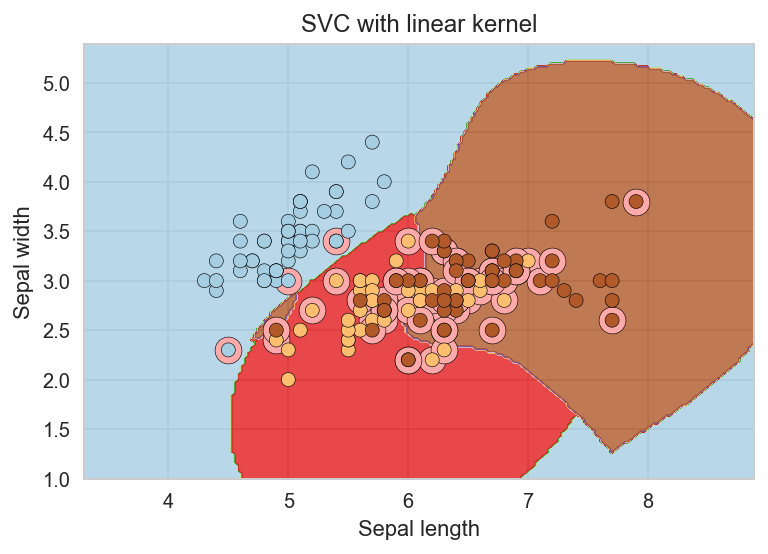

In [22]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
svs = svc.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], edgecolor='k', c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel');

**Example:** Have rbf kernel

Change the kernel type to rbf in below line and look at the impact.

In [24]:
svc = svm.SVC(kernel='rbf', C=1).fit(X, y)

In [25]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

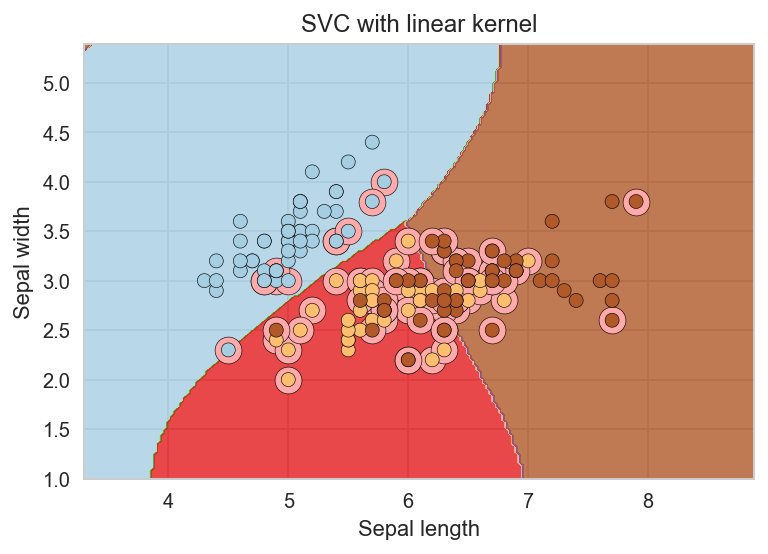

In [26]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
svs = svc.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], edgecolor='k', c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel');

I would suggest you to go for linear kernel if you have large number of features (>1000) because it is more likely that the data is linearly separable in high dimensional space. Also, you can RBF but do not forget to cross validate for its parameters as to avoid over-fitting.

**gamma:** Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

Example: Let's difference if we have gamma different gamma values like 0, 10 or 100.

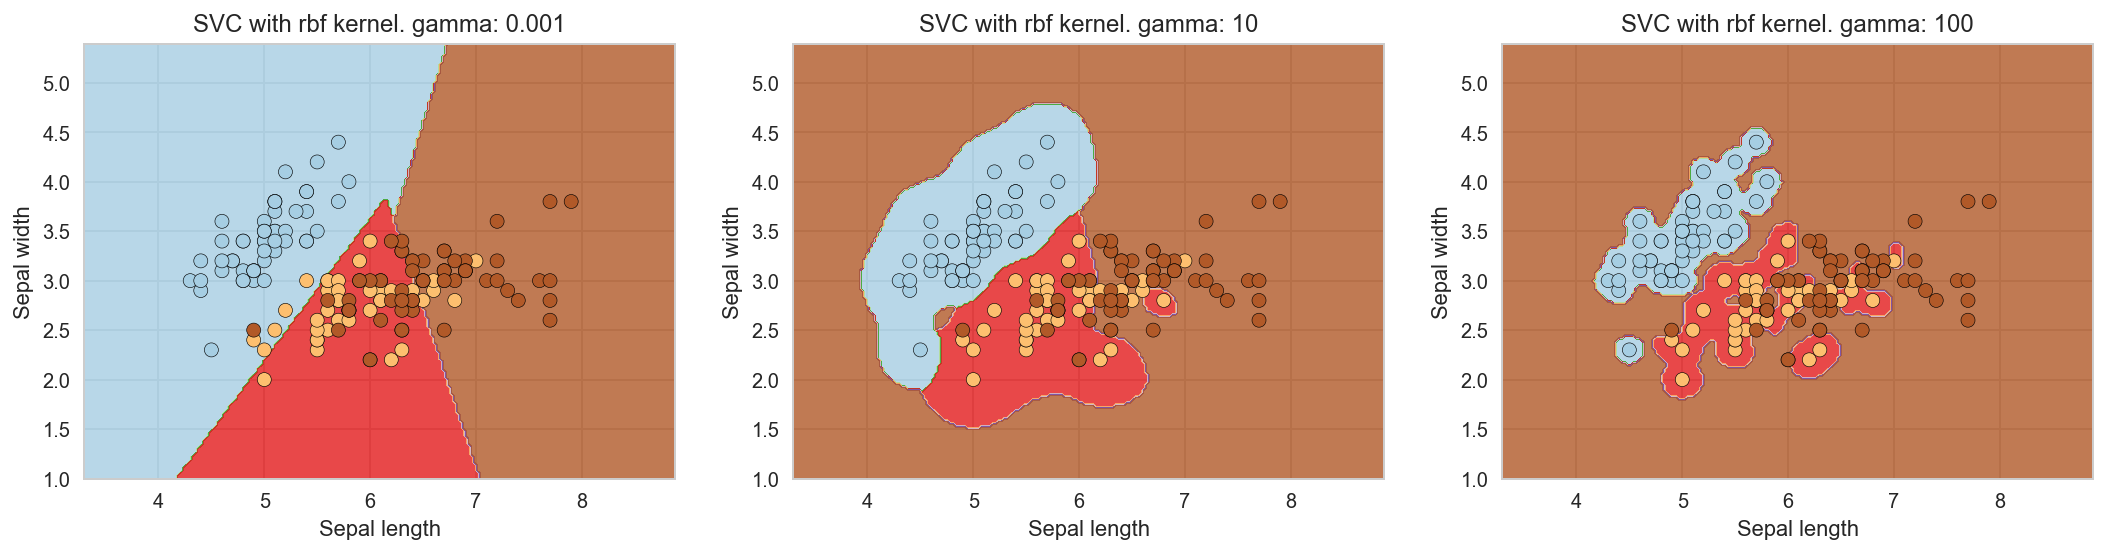

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,4))

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

for i, g in enumerate([0.001, 10, 100]):
    svc = svm.SVC(kernel='rbf', C=1, gamma=g).fit(X, y)
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    _= ax[i].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    #svs = svc.support_vectors_
    #_= ax[i].scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', edgecolors='k')
    _= ax[i].scatter(X[:, 0], X[:, 1], edgecolor='k', c=y, cmap=plt.cm.Paired)
    _= ax[i].set_xlabel('Sepal length')
    _= ax[i].set_ylabel('Sepal width')
    _= ax[i].set_xlim(xx.min(), xx.max())
    _= ax[i].set_title('SVC with rbf kernel. gamma: {0}'.format(svc.gamma))

**C:** Penalty parameter C of the error term. It also controls the trade off between smooth decision boundary and classifying the training points correctly.

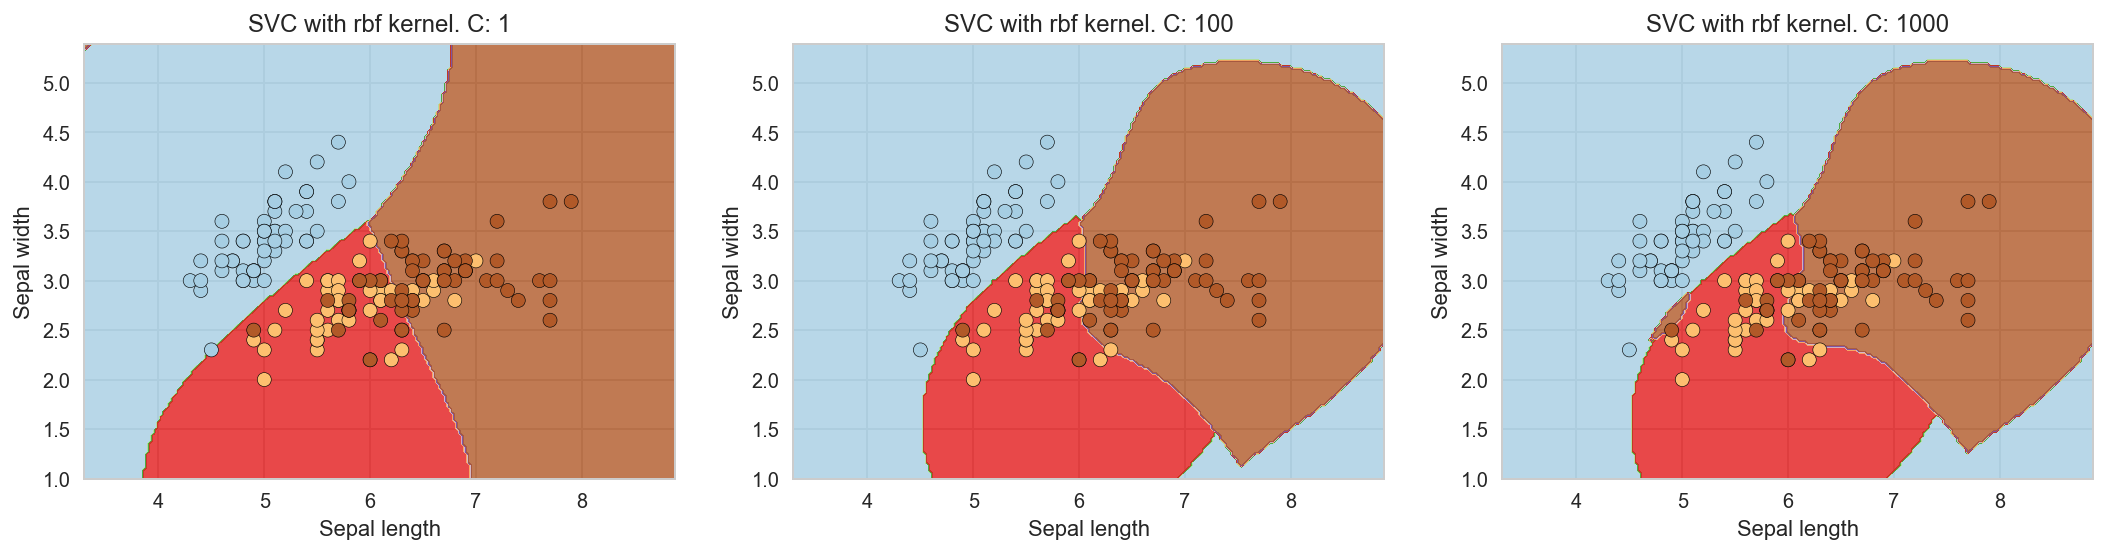

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,4))

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

for i, c in enumerate([1, 100, 1000]):
    svc = svm.SVC(kernel='rbf', C=c).fit(X, y)
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    _= ax[i].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    _= ax[i].scatter(X[:, 0], X[:, 1], edgecolor='k', c=y, cmap=plt.cm.Paired)
    _= ax[i].set_xlabel('Sepal length')
    _= ax[i].set_ylabel('Sepal width')
    _= ax[i].set_xlim(xx.min(), xx.max())
    _= ax[i].set_title('SVC with rbf kernel. C: {0}'.format(svc.C))

We should always look at the cross validation score to have effective combination of these parameters and avoid over-fitting.

## Pros and Cons associated with SVM

+ **Pros:**
    + It works really well with clear margin of separation
    + It is effective in high dimensional spaces.
    + It is effective in cases where number of dimensions is greater than the number of samples.
    + It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

+ **Cons:**
    + It doesn't perform well, when we have large data set because the required training time is higher
    + It also doesn't perform very well, when the data set has more noise i.e. target classes are overlapping
    + SVM doesn't directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library.

**Practice Problem**

Find right additional feature to have a hyper-plane for segregating the classes in below snapshot:
![](assets/SVM_19.png)

The new feature to separate data would be something like z = x^2 - y as most dots following the parabola will have lower z than stars.